## Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет [**Mortality and Water Hardness**](https://www.kaggle.com/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

### Задание 2.
**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/Fight0/python_homeworks/master/statistics/water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

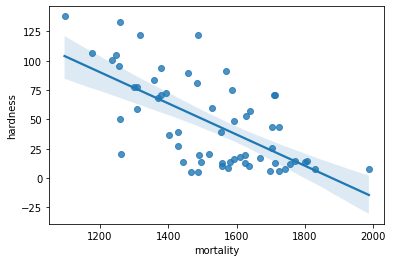

In [47]:
sns.regplot(x=df['mortality'], y=df['hardness'])

In [48]:
 df.corr() # коэффициент корреляции Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [49]:
df.corr(method='spearman') # коэффициент корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


**Коэффициенты корреляции свидетельствуют о том, что данные имеют среднюю линейную корреляцию.**

In [50]:
X, y = df[['hardness']], df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [51]:
X_train.shape

(42, 1)

In [52]:
y_train.shape

(42,)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([1631.13696606, 1597.59418098, 1463.42304067, 1634.18631016,
       1643.33434245, 1664.67975114, 1274.3637066 , 1432.92959969,
       1661.63040704, 1655.53171885, 1625.03827787, 1457.32435248,
       1600.64352508, 1371.94271773, 1500.01516985, 1637.23565426,
       1451.22566428, 1442.07763199, 1387.18943822])

In [55]:
y_test

27    1591
36    1427
61    1378
29    1772
12    1755
3     1466
35    1259
60    1485
41    1696
23    1742
5     1609
11    1392
31    1704
42    1236
34    1309
44    1444
50    1587
8     1299
15    1254
Name: mortality, dtype: int64

In [56]:
model.score(X_test, y_test) # коэффициент детерминации

0.5305131271695874

<AxesSubplot:xlabel='hardness'>

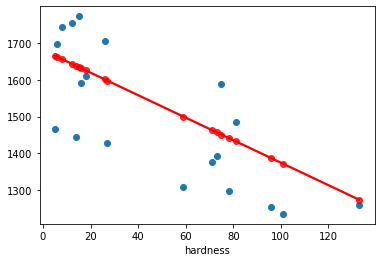

In [57]:
plt.scatter(X_test, y_test)
sns.regplot(x=X_test, y=y_pred, color='r')

Проверим, сохраняется ли аналогичная зависимость для северных и южных городов по отдельности.

In [58]:
df_n = df[df['location'] == 'North']
df_s = df[df['location'] == 'South']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

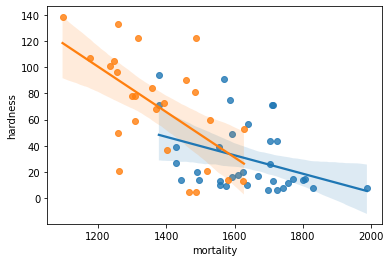

In [59]:
sns.regplot(x=df_n['mortality'], y=df_n['hardness'])
sns.regplot(x=df_s['mortality'], y=df_s['hardness'])

In [60]:
print('Север:')
print(df_n.corr())
print(df_n.corr(method='spearman'), '\n')
print('Юг:')
print(df_s.corr())
print(df_s.corr(method='spearman'))

Север:
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000 

Юг:
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000


**Согласно полученным данным корреляция между жесткостью воды и смертностью на севере Англии выражена слабее, чем на юге.**

In [61]:
Xn, yn = df_n[['hardness']], df_n['mortality']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, train_size=0.7, random_state=42)

In [62]:
Xn_train.shape

(24, 1)

In [63]:
yn_train.shape

(24,)

In [64]:
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)
yn_pred = model_n.predict(Xn_test)
model_n.score(Xn_test, yn_test)

0.018885304285745863

<AxesSubplot:xlabel='hardness'>

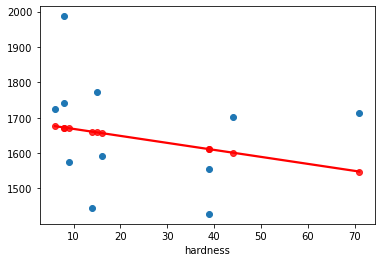

In [65]:
plt.scatter(Xn_test, yn_test)
sns.regplot(x=Xn_test, y=yn_pred, color='r')

Полученный коэффициент детерминации говорит о том, что для прогнозирования смертности в северных городах Англии построенная модель **не эффективна**.

In [66]:
Xs, ys = df_s[['hardness']], df_s['mortality']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, train_size=0.7, random_state=42)

In [67]:
Xs_train.shape

(18, 1)

In [68]:
ys_train.shape

(18,)

In [69]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)
ys_pred = model_s.predict(Xs_test)
model_s.score(Xs_test, ys_test)

-2.5519223012352077

<AxesSubplot:xlabel='hardness'>

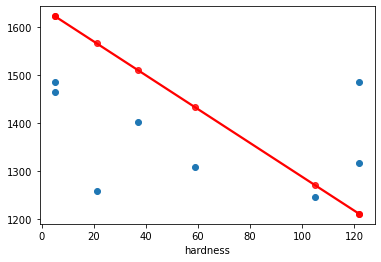

In [70]:
plt.scatter(Xs_test, ys_test)
sns.regplot(x=Xs_test, y=ys_pred, color='r')

Полученный коэффициент детерминации говорит о том, что для прогнозирования смертности в южных городах Англии построенная модель **не эффективна**.